# **Salary Data Analysis**

### **Initial Data Exploration**

In [2]:
# Import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
salary = pd.read_csv("Salary_Data.csv")
print(salary.head())

# Check the data type 
print(salary.dtypes)


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [4]:
# Check null data
print(salary.isnull().sum())

# Analyze rows with null data
print(salary[salary["Age"].isnull()])
print(salary[salary["Gender"].isnull()])
print(salary[salary["Education Level"].isnull()])
print(salary[salary["Job Title"].isnull()])
print(salary[salary["Years of Experience"].isnull()])
print(salary[salary["Salary"].isnull()])

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64
     Age Gender Education Level Job Title  Years of Experience  Salary
172  NaN    NaN             NaN       NaN                  NaN     NaN
260  NaN    NaN             NaN       NaN                  NaN     NaN
     Age Gender Education Level Job Title  Years of Experience  Salary
172  NaN    NaN             NaN       NaN                  NaN     NaN
260  NaN    NaN             NaN       NaN                  NaN     NaN
       Age Gender Education Level  Job Title  Years of Experience    Salary
172    NaN    NaN             NaN        NaN                  NaN       NaN
260    NaN    NaN             NaN        NaN                  NaN       NaN
2011  27.0   Male             NaN  Developer                  7.0  100000.0
     Age Gender Education Level Job Title  Years of Experience  Salary
172  NaN    NaN             NaN     

In [5]:
# Drop rows with null data in all column
salary_updated = salary.dropna(subset=["Age", "Education Level", "Years of Experience", "Salary"]) # column with null data in Age is the same as rows with null data in Gender and Job Title
print(salary_updated.isnull().sum())

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [6]:
# Standardize the values in the dataset
print(salary_updated["Age"].unique()) # Check unique value of each column
print(salary_updated["Gender"].unique())
print(salary_updated["Education Level"].unique())

# Adjust value in Education Level to be the same ("Bachelor's Degree" "Master's Degree" 'PhD' 'High School')
salary_updated["Education Level"] = salary_updated["Education Level"].replace({"Bachelor's":"Bachelor's Degree","Master's":"Master's Degree","phD":"PhD"})
print(salary_updated["Education Level"].unique())

[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. 61. 57. 62. 55. 56.
 54. 60. 58. 22. 21.]
['Male' 'Female' 'Other']
["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
["Bachelor's Degree" "Master's Degree" 'PhD' 'High School']


/var/folders/zx/98d0w0_x5wvdy3676rw16z540000gn/T/ipykernel_1698/1744122771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_updated["Education Level"] = salary_updated["Education Level"].replace({"Bachelor's":"Bachelor's Degree","Master's":"Master's Degree","phD":"PhD"})


### **Basic Data Exploration**

In [7]:
# Analyze the most common job titles in the dataset
common_job = salary_updated["Job Title"].value_counts()
print(common_job)
print(f"The most common job in this dataset is Software Engineer")

Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64
The most common job in this dataset is Software Engineer


In [8]:
# Analyze the average, minimum, and maximum value of salary data
avg_salary = salary_updated["Salary"].mean()
min_salary = salary_updated["Salary"].min()
max_salary = salary_updated["Salary"].max()
print(f"The average salary in this dataset is {round(avg_salary,2)}")
print(f"The lowest salary in this dataset is {round(min_salary,2)}")
print(f"The highest salary in this dataset is {round(max_salary,2)}")


The average salary in this dataset is 115329.25
The lowest salary in this dataset is 350.0
The highest salary in this dataset is 250000.0


In [9]:
# Analyze total employee by gender
gender_employee = salary_updated["Gender"].value_counts()
print(gender_employee)
gender_employee_percent = salary_updated["Gender"].value_counts(normalize=True) * 100 # total percentage of employee by gender in percentage
gender_employee_percent = gender_employee_percent.round(2)
print(gender_employee_percent)

Gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64
Gender
Male      54.81
Female    44.98
Other      0.21
Name: proportion, dtype: float64


In [10]:
# Analyze average age by gender
avg_age_by_gender = salary_updated.groupby("Gender")["Age"].mean()
print(round(avg_age_by_gender,1))

Gender
Female    32.6
Male      34.4
Other     39.6
Name: Age, dtype: float64


In [11]:
# Analyze average salary by education level
avg_salary_by_edu = salary_updated.groupby("Education Level")["Salary"].mean()
print(round(avg_salary_by_edu.sort_values()),2)

Education Level
High School           36707.0
Bachelor's Degree     95083.0
Master's Degree      130112.0
PhD                  165651.0
Name: Salary, dtype: float64 2


In [12]:
# Analyze average salary by gender
avg_salary_by_gender = salary_updated.groupby("Gender")["Salary"].mean()
print(round(avg_salary_by_gender,2))


Gender
Female    107889.00
Male      121395.70
Other     125869.86
Name: Salary, dtype: float64


In [13]:
# Analyze average salary by age group 
print(salary_updated["Age"].min()) # find minimum and maximum value of age to set the bin range
print(salary_updated["Age"].max())

labels = ["21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65"]
salary_updated["Age Group"] = pd.cut(salary_updated["Age"], bins= range(21, 67, 5), labels=labels, right=False)
avg_salary_by_age = salary_updated.groupby("Age Group")["Salary"].mean()
print(round(avg_salary_by_age,2))

21.0
62.0
Age Group
21-25     54770.96
26-30     83071.43
31-35    122889.65
36-40    141440.70
41-45    161475.07
46-50    184859.01
51-55    192005.33
56-60    189249.00
61-65    200000.00
Name: Salary, dtype: float64


/var/folders/zx/98d0w0_x5wvdy3676rw16z540000gn/T/ipykernel_1698/2620474489.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_updated["Age Group"] = pd.cut(salary_updated["Age"], bins= range(21, 67, 5), labels=labels, right=False)
/var/folders/zx/98d0w0_x5wvdy3676rw16z540000gn/T/ipykernel_1698/2620474489.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_age = salary_updated.groupby("Age Group")["Salary"].mean()


In [14]:
# Analyze average salary across education level, broken down by gender
avg_salary_by_edu_gender = salary_updated.groupby(["Education Level","Gender"])["Salary"].mean()
print(round(avg_salary_by_edu_gender,2))

Education Level    Gender
Bachelor's Degree  Female     89165.22
                   Male       98971.77
High School        Female     30756.05
                   Male       39380.75
                   Other     119949.33
Master's Degree    Female    122694.54
                   Male      140060.59
                   Other     161393.00
PhD                Female    160266.29
                   Male      168711.07
Name: Salary, dtype: float64


In [15]:
# Analyze Top 10 Jobs with highest salary
avg_salary_by_job = round(salary_updated.groupby("Job Title")["Salary"].mean(),2)
avg_salary_by_job.sort_values(ascending=False).head(10)

Job Title
Chief Technology Officer       250000.00
CEO                            250000.00
Chief Data Officer             220000.00
Director of Data Science       204561.40
VP of Finance                  200000.00
Director                       200000.00
VP of Operations               190000.00
Operations Director            190000.00
Director of Human Resources    187500.00
Marketing Director             183984.38
Name: Salary, dtype: float64

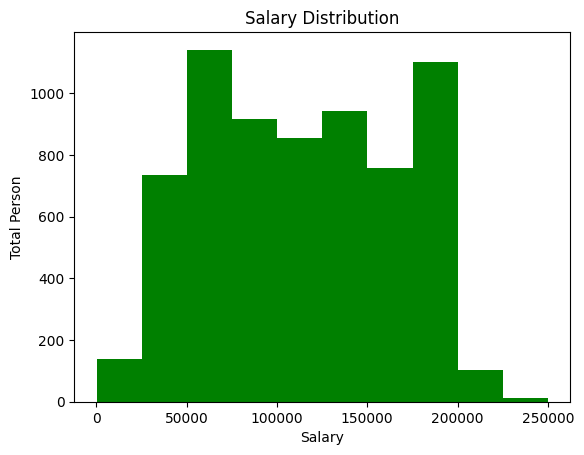

<Figure size 640x480 with 0 Axes>

In [16]:
# Visualize the distribution of salary
plt.hist(salary_updated["Salary"], color="green")
plt.xlabel("Salary")
plt.ylabel("Total Person")
plt.title("Salary Distribution")
plt.show()
plt.clf()

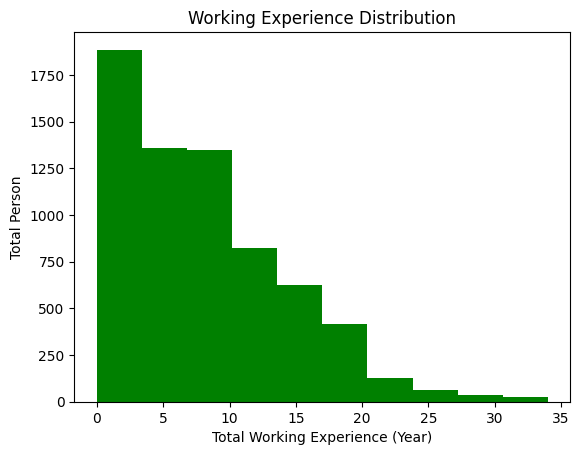

<Figure size 640x480 with 0 Axes>

In [17]:
# Visualize the distribution of working experience (year)
plt.hist(salary_updated["Years of Experience"], color="green")
plt.xlabel("Total Working Experience (Year)")
plt.ylabel("Total Person")
plt.title("Working Experience Distribution")
plt.show()
plt.clf()

Education Level
Bachelor's Degree    3021
Master's Degree      1860
PhD                  1369
High School           448
Name: count, dtype: int64


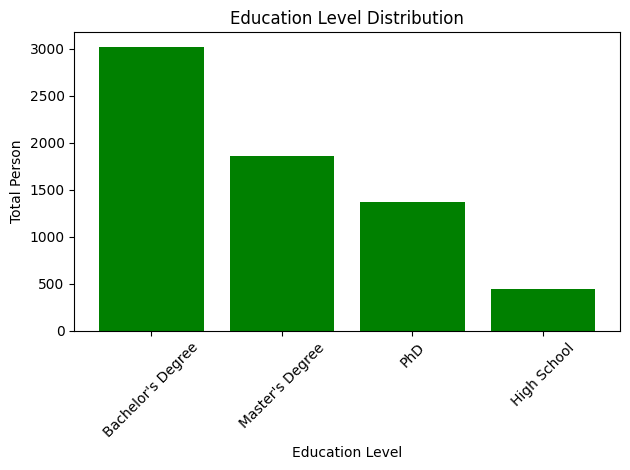

<Figure size 640x480 with 0 Axes>

In [18]:
# Visualize the distribution of education level
edu_level = salary_updated["Education Level"].value_counts()
print(edu_level)
plt.bar(edu_level.index, edu_level.values, align= "center", color="green")
plt.xlabel("Education Level")
plt.ylabel("Total Person")
plt.xticks(rotation= 45)
plt.title("Education Level Distribution")
plt.tight_layout()
plt.show()
plt.clf()

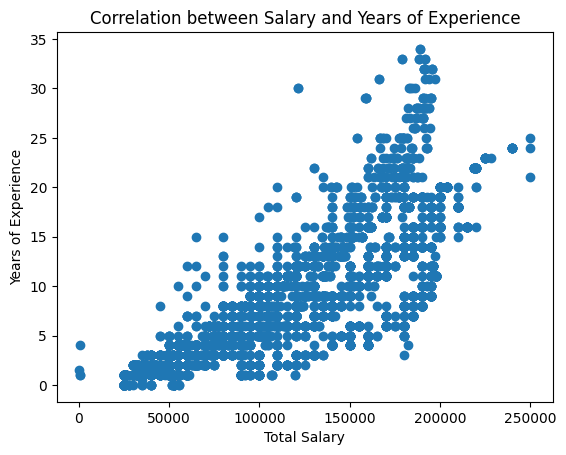

The correlation between Salary and Years of Working Experience is 0.81


<Figure size 640x480 with 0 Axes>

In [19]:
# Visualize the correlation between salary and working experience
plt.scatter(salary_updated["Salary"], salary_updated["Years of Experience"])
plt.xlabel("Total Salary")
plt.ylabel("Years of Experience")
plt.title("Correlation between Salary and Years of Experience")
plt.show()
plt.clf()

# Calculate the correlation value
salary_vs_working_exp = salary_updated["Salary"].corr(salary_updated["Years of Experience"])
print(f"The correlation between Salary and Years of Working Experience is {round(salary_vs_working_exp,2)}")

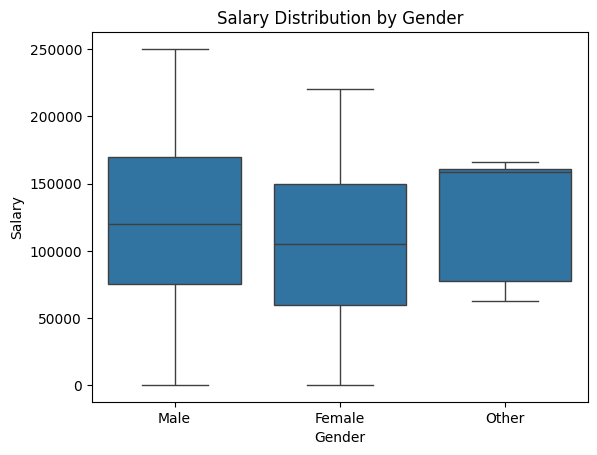

<Figure size 640x480 with 0 Axes>

In [20]:
# Visualize the salary data of each gender
sns.boxplot(data= salary_updated, x=salary_updated["Gender"], y=salary_updated["Salary"])
plt.title("Salary Distribution by Gender")
plt.show()
plt.clf()